# Non-Text Related Analysis

### Import Packages

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from IPython.display import display

### Read in data

In [32]:
awards_data = pd.read_csv("awards_data_noboiler.csv")
awards_data = awards_data.drop(['Abstract', 'StartDate', 'LastAmendmentDate', 'AwardInstrument', 'ProgramManager', 'EndDate', 'Co-PIName(s)', 
                               'PIEmailAddress', 'OrganizationStreet',  'OrganizationCity', 'OrganizationState', 'State', 'OrganizationZip',
                                'OrganizationPhone'], axis=1) # removing variables I don't want to analyze right now
pd.set_option('display.max_columns', None)
awards_data.head(20)



,AwardNumber,Title,NSFOrganization,Program(s),PrincipalInvestigator,Organization,AwardedAmountToDate,NSFDirectorate,ProgramElementCode(s),ProgramReferenceCode(s),ARRAAmount,Year
0,1560196,REU Site: Earth Science on Volcanic Islands,EAR,"EDUCATION AND HUMAN RESOURCES, EDUCATION/HUMAN...",Paul Wessel,University of Hawaii,"$509,273.00",GEO,"157500, 169000, 915000","9150, 9250",$0.00,2016
1,1560048,REU Site: Sustainable RIVER (Remediating InVa...,DBI,"RSCH EXPER FOR UNDERGRAD SITES, EDUCATION AND ...",Meghann Jarchow,University of South Dakota Main Campus,"$323,864.00",BIO,"113900, 157500, 915000","9150, 9250",$0.00,2016
2,1560200,REU Site: Integrated Science For Society (IS2),DBI,"RSCH EXPER FOR UNDERGRAD SITES, Cross-BIO Acti...",Kenneth Burch,Boston College,"$343,816.00",BIO,"113900, 727500, 198600","8007, 9250, 8091",$0.00,2016
3,1560169,REU Site: Utilizing Plants for Innovative Rese...,DBI,RSCH EXPER FOR UNDERGRAD SITES,Lihua Wang,Kettering University,"$279,525.00",BIO,113900,9250,$0.00,2016
4,1563408,Hidden Costs of Decomposition: The Need for Fi...,CMMI,"EDSE-Engineering Design and Sy, SYS-Systems Sc...",Erica Gralla,George Washington University,"$247,214.00",ENG,"072Y00, 808500","9251, 9102, 9178, 9231, 116E, 067E, 073E, 8043...",$0.00,2016
5,1561839,Nanomanufacturing of 3D Networks of 2D Materia...,CMMI,NANOMANUFACTURING,Seth Tongay,Arizona State University,"$200,000.00",ENG,178800,"082E, 083E, 084E, 9146, MANU",$0.00,2016
6,1564055,TWC: Medium: Collaborative: Efficient Repair o...,CNS,Secure &Trustworthy Cyberspace,Junfeng Yang,Columbia University,"$600,068.00",CSE,806000,"7924, 7434",$0.00,2016
7,1557007,NSF DEB-NERC: Phylogenomics and Sensory System...,DEB,"PHYLOGENETIC SYSTEMATICS, GoLife",Akito Kawahara,University of Florida,"$820,932.00",BIO,"117100, 613300","1228, 7744, 9178, 9251",$0.00,2016
8,1562027,Enabling the Design of Failure-Tolerant Comple...,CMMI,SYS-Systems Science,Irem Tumer,Oregon State University,"$466,430.00",ENG,808500,"067E, 068E, 8024, 8043, 9102",$0.00,2016
9,1609817,Understanding and Controlling Subcritical Crac...,DMR,METAL & METALLIC NANOSTRUCTURE,Christopher Muhlstein,Georgia Tech Research Corporation,"$402,439.00",MPS,177100,NaN,$0.00,2016


### Money

In [18]:
# Cleanup the AwardedAmountToDate column
awards_data['AwardedAmountToDate'] = (
    awards_data['AwardedAmountToDate']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

In [21]:
award_stats_by_year = awards_data.groupby('Year')['AwardedAmountToDate'].agg(
    Average='mean',
    Total='sum'
).reset_index()

award_stats_by_year

,Year,Average,Total
0,2016,417123.865578,664061194.0
1,2017,457814.810080,744864696.0
2,2018,417174.765204,541910020.0
3,2019,405832.196516,745513745.0
4,2020,384763.399665,688341722.0
5,2021,459759.755886,742052246.0
6,2022,430663.527378,747201220.0
7,2023,483575.315501,705052810.0
8,2024,469170.456550,723460844.0
9,2025,370094.104141,294965001.0


In [25]:
display(award_stats_by_year.style.format({
    'Average': '${:,.2f}',
    'Total': '${:,.0f}'
}))


,Year,Average,Total
0,2016,"$417,123.87","$664,061,194"
1,2017,"$457,814.81","$744,864,696"
2,2018,"$417,174.77","$541,910,020"
3,2019,"$405,832.20","$745,513,745"
4,2020,"$384,763.40","$688,341,722"
5,2021,"$459,759.76","$742,052,246"
6,2022,"$430,663.53","$747,201,220"
7,2023,"$483,575.32","$705,052,810"
8,2024,"$469,170.46","$723,460,844"
9,2025,"$370,094.10","$294,965,001"


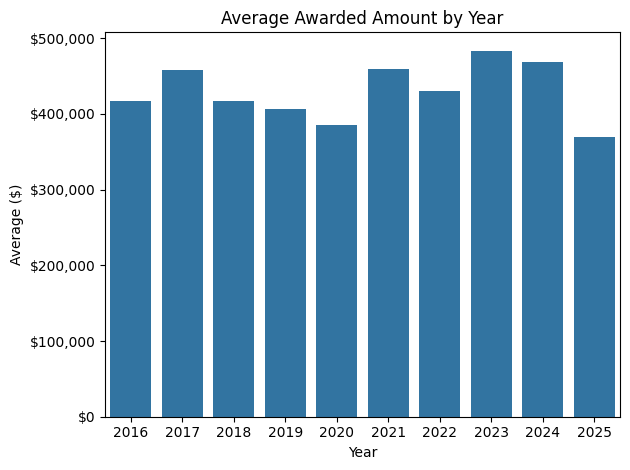

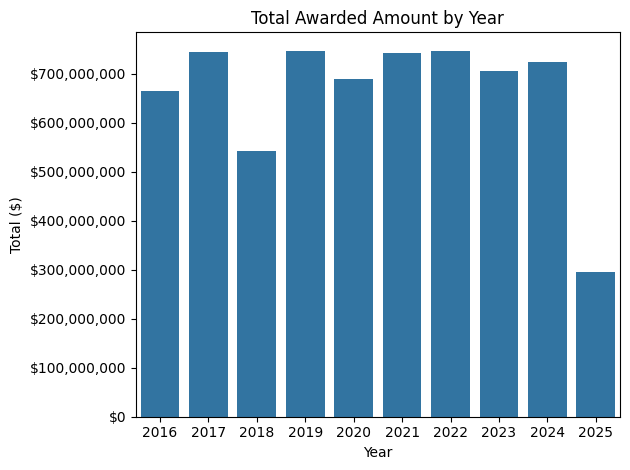

In [26]:
# Average awarded amount by year
sns.barplot(data=award_stats_by_year, x='Year', y='Average')
plt.title('Average Awarded Amount by Year')
plt.ylabel('Average ($)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.show()

# Total awarded amount by year
sns.barplot(data=award_stats_by_year, x='Year', y='Total')
plt.title('Total Awarded Amount by Year')
plt.ylabel('Total ($)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.tight_layout()
plt.show()

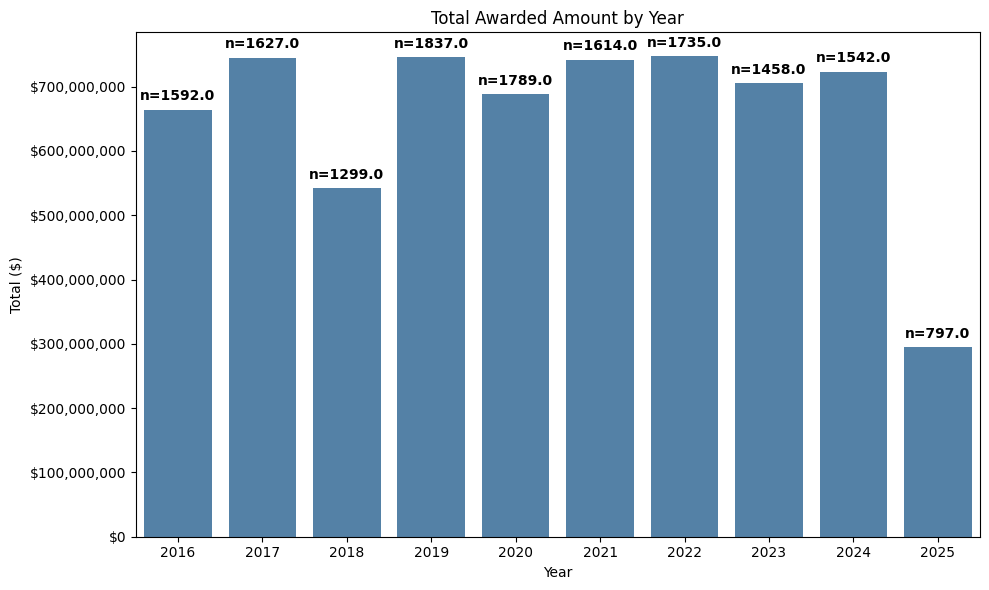

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# First, calculate total award and count (n) per year
award_stats_by_year = awards_data.groupby('Year').agg(
    Total=('AwardedAmountToDate', 'sum'),
    n=('AwardedAmountToDate', 'count')
).reset_index()

# Plot the total awarded amount
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=award_stats_by_year, x='Year', y='Total', color='steelblue')

# Format y-axis as currency
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.title('Total Awarded Amount by Year')
plt.ylabel('Total ($)')
plt.xlabel('Year')

# Add `n=...` labels on each bar
for i, row in award_stats_by_year.iterrows():
    ax.text(
        x=i,
        y=row['Total'] + 1e7,  # Adjust height as needed
        s=f"n={row['n']}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

### NSF Directorate

https://www.nsf.gov/about/directorates-offices#mps

NSF Priorities: https://www.nsf.gov/updates-on-priorities

In [31]:
print(awards_data['NSFDirectorate'].unique())
len(awards_data['NSFDirectorate'].unique())
# 1 GEO = GEOSCIENCES
# 2 BIO = BIOLOGICAL SCIENCES
# 3 ENG = ENGINEERING
# 4 CSE = COMPUTER AND INFORMATION SCIENCE AND ENGINEERING
# 5 MPS = MATHEMATICAL AND PHYSICAL SCIENCES
# 6 EDU = STEM EDUCATION
# 7 SBE = SOCIAL, BEHAVIORAL AND ECONOMIC SCIENCES
# 8 TIP = TECHNOLOGY, INNOVATION AND PARTNERSHIPS
# 9 O/D =  ??

['GEO' 'BIO' 'ENG' 'CSE' 'MPS' 'EDU' 'O/D' 'SBE' 'TIP']


9

In [33]:
award_counts = (
    awards_data
    .groupby(['Year', 'NSFDirectorate'])
    .size()
    .reset_index(name='Count')
)

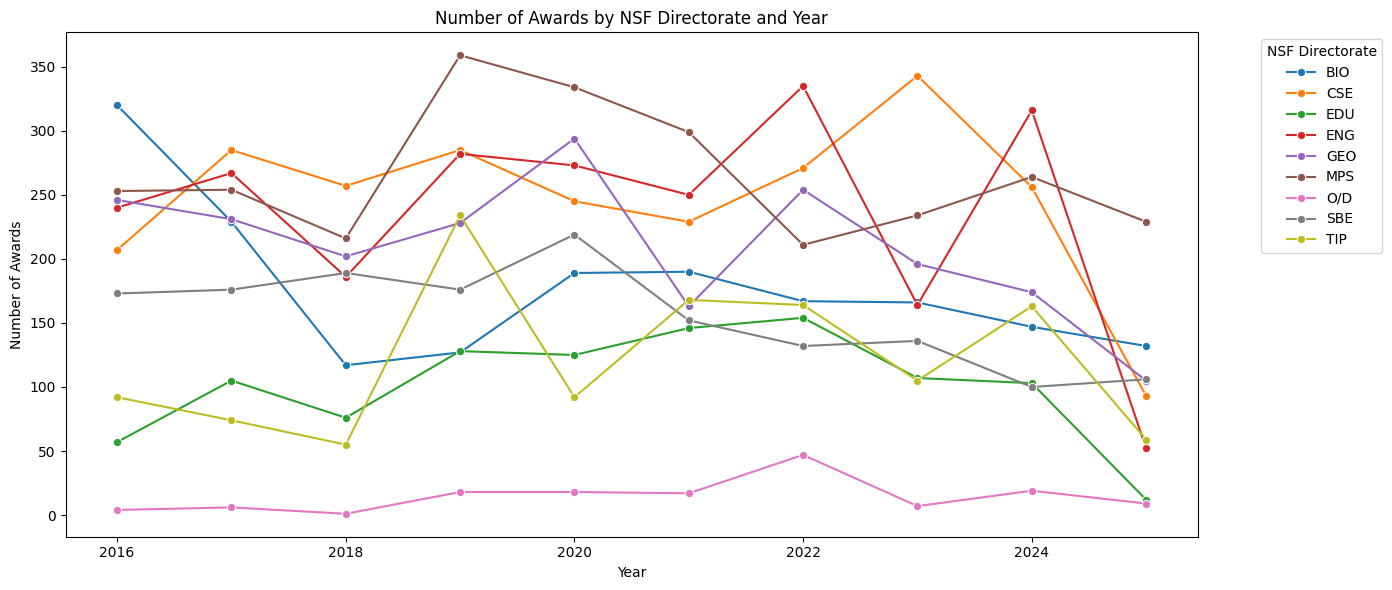

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot by NSFDirectorate
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=award_counts,
    x='Year',
    y='Count',
    hue='NSFDirectorate',
    marker='o'
)

plt.title('Number of Awards by NSF Directorate and Year')
plt.ylabel('Number of Awards')
plt.xlabel('Year')
plt.legend(title='NSF Directorate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

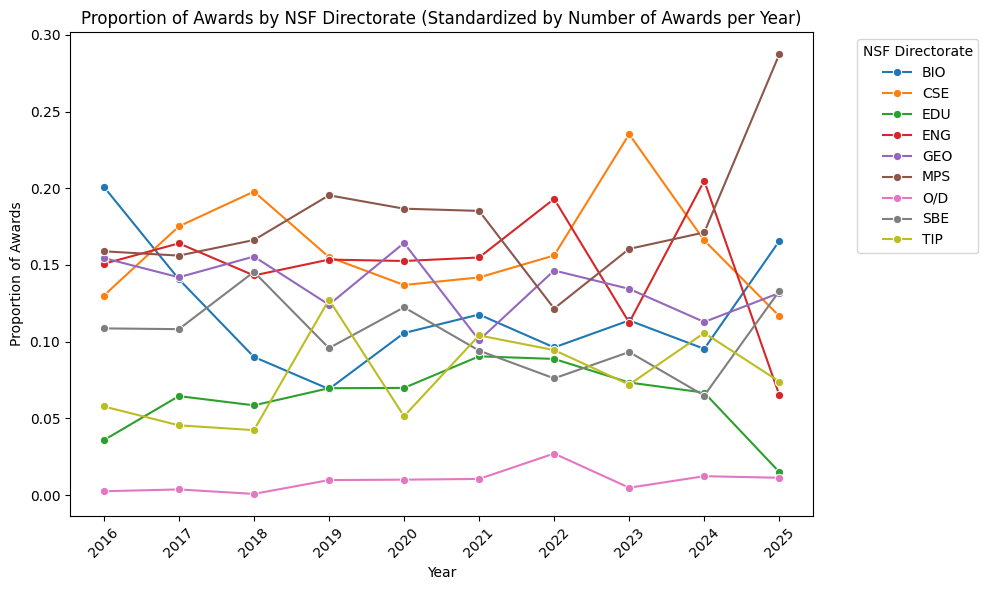

In [39]:
# Step 1: Count awards per year and directorate
award_counts = (
    awards_data
    .groupby(['Year', 'NSFDirectorate'])
    .size()
    .reset_index(name='Count')
)

# Step 2: Add total number of awards per year
total_per_year = (
    award_counts
    .groupby('Year')['Count']
    .sum()
    .reset_index(name='YearTotal')
)

# Step 3: Merge and calculate standardized proportions
award_counts = award_counts.merge(total_per_year, on='Year')
award_counts['Proportion'] = award_counts['Count'] / award_counts['YearTotal']

# Step 4: Line plot of standardized proportions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=award_counts,
    x='Year',
    y='Proportion',
    hue='NSFDirectorate',
    marker='o'
)

plt.title('Proportion of Awards by NSF Directorate (Standardized by Number of Awards per Year)')
plt.ylabel('Proportion of Awards')
plt.xlabel('Year')
plt.legend(title='NSF Directorate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=sorted(award_counts['Year'].unique()), rotation=45)
plt.tight_layout()
plt.show()

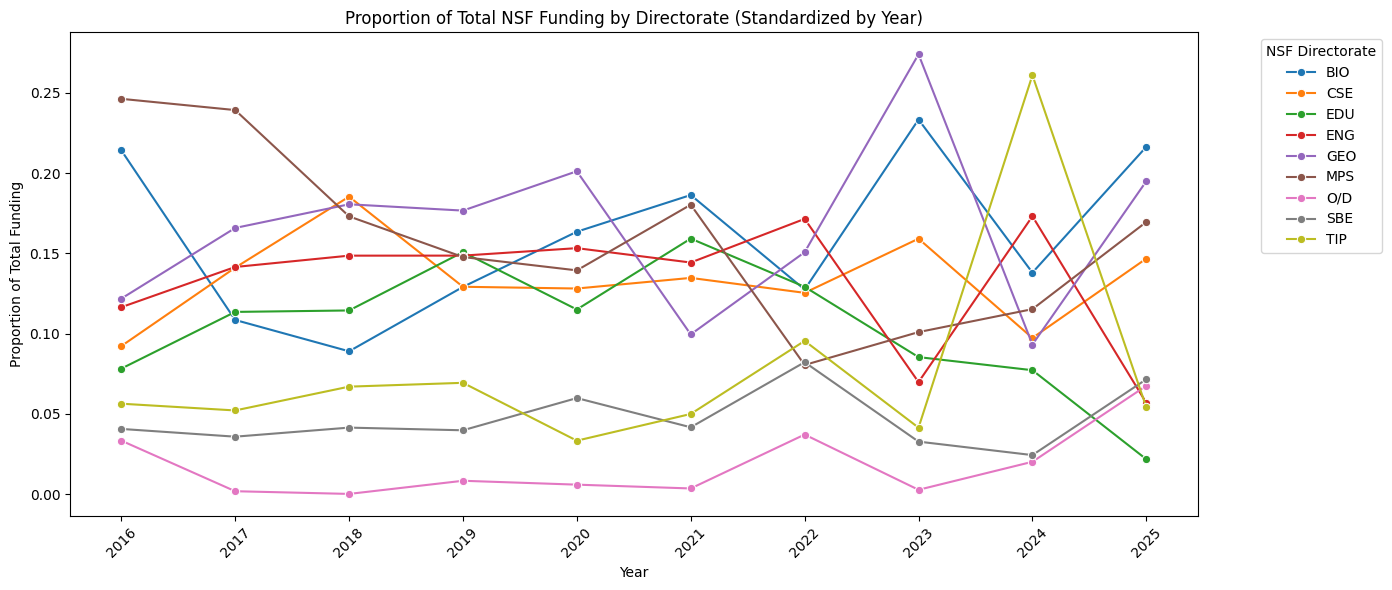

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Step 1: Clean column (if not done yet)
awards_data['AwardedAmountToDate'] = (
    awards_data['AwardedAmountToDate']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

# Step 2: Sum award amounts by year and directorate
money_by_dir = (
    awards_data
    .groupby(['Year', 'NSFDirectorate'])['AwardedAmountToDate']
    .sum()
    .reset_index(name='TotalAmount')
)

# Step 3: Calculate yearly totals
yearly_total = (
    money_by_dir
    .groupby('Year')['TotalAmount']
    .sum()
    .reset_index(name='YearTotal')
)

# Step 4: Merge and calculate proportion
money_by_dir = money_by_dir.merge(yearly_total, on='Year')
money_by_dir['Proportion'] = money_by_dir['TotalAmount'] / money_by_dir['YearTotal']

# Step 5: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=money_by_dir,
    x='Year',
    y='Proportion',
    hue='NSFDirectorate',
    marker='o'
)

plt.title('Proportion of Total NSF Funding by Directorate (Standardized by Year)')
plt.ylabel('Proportion of Total Funding')
plt.xlabel('Year')
plt.legend(title='NSF Directorate', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=sorted(money_by_dir['Year'].unique()), rotation=45)
plt.tight_layout()
plt.show()

### NSF Organization

In [44]:
print(awards_data['NSFOrganization'].unique())
len(awards_data['NSFOrganization'].unique())

['EAR' 'DBI' 'CMMI' 'CNS' 'DEB' 'DMR' 'DUE' 'IIS' 'OISE' 'OCE' 'CBET'
 'SES' 'BCS' 'CCF' 'DMS' 'AST' 'PHY' 'SMA' 'AGS' 'EEC' 'TI' 'CHE' 'OPP'
 'IOS' 'OIA' 'OAC' 'EES' 'RISE' 'ECCS' 'MCB' 'DRL' 'EFMA' 'DGE' 'EF' 'ITE'
 'CRSP']


36

In [45]:
nsf_org_lookup = {
    'EAR': 'Division of Earth Sciences',
    'DBI': 'Division of Biological Infrastructure',
    'CMMI': 'Civil, Mechanical and Manufacturing Innovation',
    'CNS': 'Computer and Network Systems',
    'DEB': 'Division of Environmental Biology',
    'DMR': 'Division of Materials Research',
    'DUE': 'Division of Undergraduate Education',
    'IIS': 'Information and Intelligent Systems',
    'OISE': 'Office of International Science and Engineering',
    'OCE': 'Division of Ocean Sciences',
    'CBET': 'Chemical, Bioengineering, Environmental, and Transport Systems',
    'SES': 'Social and Economic Sciences',
    'BCS': 'Behavioral and Cognitive Sciences',
    'CCF': 'Computing and Communication Foundations',
    'DMS': 'Division of Mathematical Sciences',
    'AST': 'Division of Astronomical Sciences',
    'PHY': 'Physics Division',
    'SMA': 'SBE Office of Multidisciplinary Activities',
    'AGS': 'Atmospheric and Geospace Sciences',
    'EEC': 'Engineering Education and Centers',
    'TI': 'Technology Innovation',
    'CHE': 'Chemistry Division',
    'OPP': 'Office of Polar Programs',
    'IOS': 'Integrative Organismal Systems',
    'OIA': 'Office of Integrative Activities',
    'OAC': 'Office of Advanced Cyberinfrastructure',
    'EES': 'Environmental and Earth Systems',
    'RISE': 'Research Infrastructure Support and Enhancement',
    'ECCS': 'Electrical, Communications and Cyber Systems',
    'MCB': 'Molecular and Cellular Biosciences',
    'DRL': 'Division of Research on Learning',
    'EFMA': 'Emerging Frontiers in Materials Research',
    'DGE': 'Division of Graduate Education',
    'EF': 'Emerging Frontiers',
    'ITE': 'Innovation and Technology Ecosystems',
    'CRSP': 'Center for Research on Science Policy'
}

In [47]:
money_by_org = (
    awards_data
    .groupby(['Year', 'NSFOrganization'])['AwardedAmountToDate']
    .sum()
    .reset_index(name='TotalAmount')
)

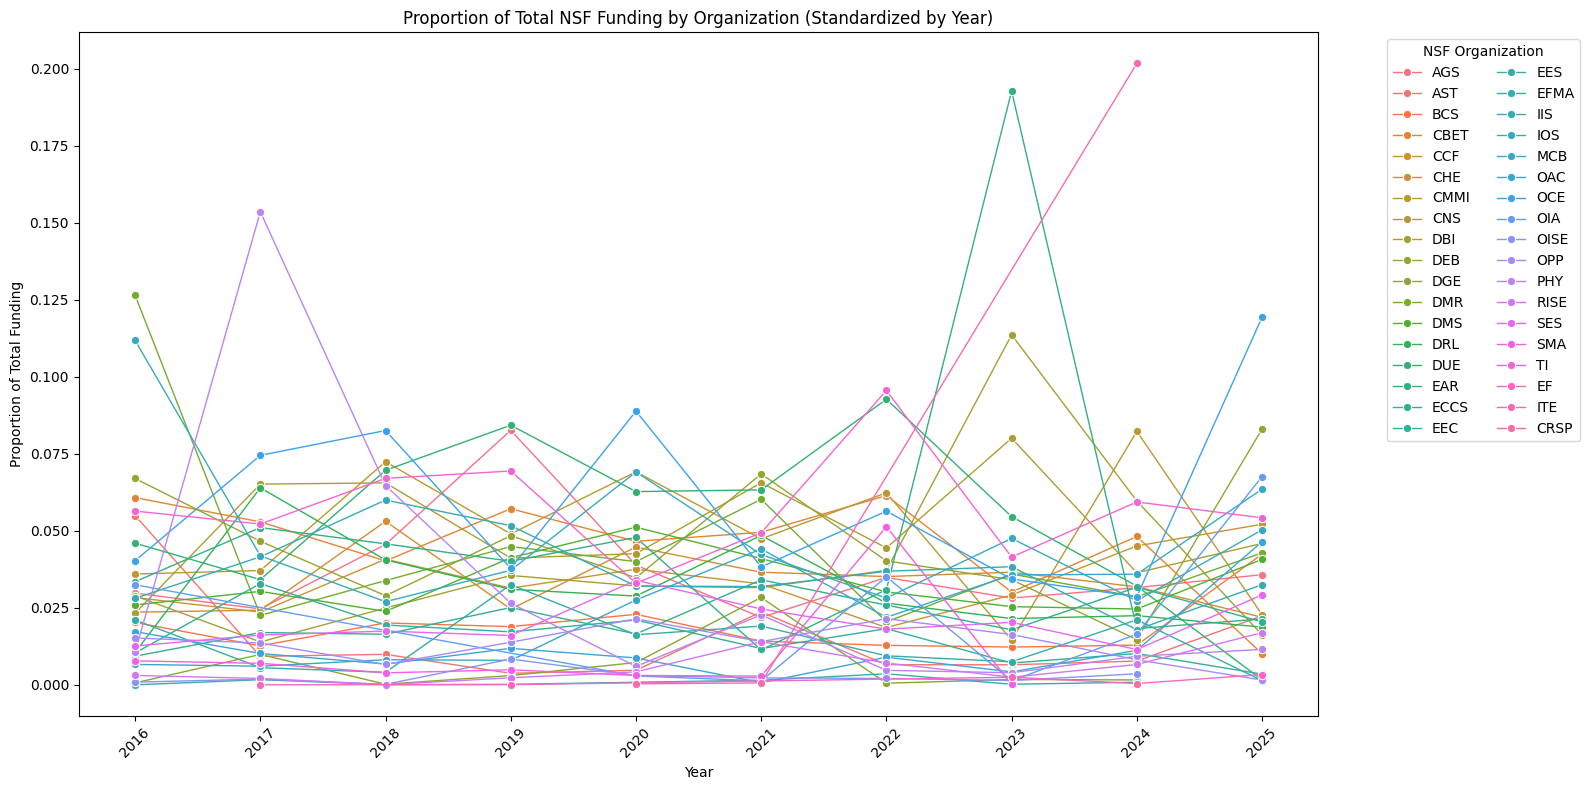

In [49]:
yearly_totals = (
    money_by_org
    .groupby('Year')['TotalAmount']
    .sum()
    .reset_index(name='YearTotal')
)

# Step 4: Merge and standardize
money_by_org = money_by_org.merge(yearly_totals, on='Year')
money_by_org['Proportion'] = money_by_org['TotalAmount'] / money_by_org['YearTotal']

# Step 5: Plot standardized line chart
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=money_by_org,
    x='Year',
    y='Proportion',
    hue='NSFOrganization',
    marker='o',
    linewidth=1
)

plt.title('Proportion of Total NSF Funding by Organization (Standardized by Year)')
plt.ylabel('Proportion of Total Funding')
plt.xlabel('Year')
plt.xticks(ticks=sorted(money_by_org['Year'].unique()), rotation=45)
plt.legend(title='NSF Organization', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

In [50]:
# Does one org's funding change across years (Im sure yes, then pairwise tests)

from scipy.stats import kruskal

# Filter to a specific org
org_name = 'DBI'
org_data = awards_data[awards_data['NSFOrganization'] == org_name]

# Group funding data by year
grouped = [group['AwardedAmountToDate'].values for _, group in org_data.groupby('Year')]

# Kruskal-Wallis test
stat, p = kruskal(*grouped)

print(f"{org_name}: H={stat:.2f}, p-value={p:.4f}")

DBI: H=10.47, p-value=0.3139


In [67]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
import pandas as pd

# Step 1: Standardize award amount by year total
awards_data = awards_data.copy()
awards_data['AwardedAmountToDate'] = awards_data['AwardedAmountToDate'].replace('[\$,]', '', regex=True).astype(float)

total_by_year = awards_data.groupby('Year')['AwardedAmountToDate'].transform('sum')
awards_data['ProportionalAmount'] = awards_data['AwardedAmountToDate'] / total_by_year

# Step 2: Run year-to-year comparisons on standardized award amounts
all_results = []

for org_name in sorted(awards_data['NSFOrganization'].unique()):
    org_data = awards_data[awards_data['NSFOrganization'] == org_name]
    years = sorted(org_data['Year'].unique())

    for i in range(len(years) - 1):
        y1, y2 = years[i], years[i + 1]

        group1 = org_data[org_data['Year'] == y1]['ProportionalAmount']
        group2 = org_data[org_data['Year'] == y2]['ProportionalAmount']

        if len(group1) > 0 and len(group2) > 0:
            stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
            mean_diff = group2.mean() - group1.mean()
            all_results.append({
                'Organization': org_name,
                'Year1': y1,
                'Year2': y2,
                'YearPair': f"{y1}–{y2}",
                'MeanPropDiff': mean_diff,
                'U_stat': stat,
                'p_value': p
            })

# Step 3: FDR correction
org_year_prop_df = pd.DataFrame(all_results)
org_year_prop_df['FDR_corrected'], org_year_prop_df['q_value'], _, _ = multipletests(
    org_year_prop_df['p_value'], alpha=0.05, method='fdr_bh'
)


results_24_25 = org_year_test_df[
    (org_year_test_df['Year1'] == 2024) & 
    (org_year_test_df['Year2'] == 2025)
]

print(results_24_25.sort_values('p_value'))

    Organization  Year1  Year2   YearPair      MeanDiff  U_stat   p_value  \
106          DMR   2024   2025  2024–2025 -1.282170e+05  2016.5  0.000105   
35          CBET   2024   2025  2024–2025 -1.529403e+05   902.0  0.002312   
151         ECCS   2024   2025  2024–2025 -7.375153e+04   683.0  0.024434   
189          IIS   2024   2025  2024–2025  1.959623e+05   401.5  0.027859   
53           CHE   2024   2025  2024–2025 -1.134902e+05  1311.0  0.029668   
209          MCB   2024   2025  2024–2025 -1.583709e+05  1121.5  0.055314   
89           DEB   2024   2025  2024–2025  2.031878e+05   349.0  0.057570   
218          OAC   2024   2025  2024–2025  1.080490e+06    83.0  0.061060   
198          IOS   2024   2025  2024–2025 -1.436964e+05   874.0  0.070764   
8            AGS   2024   2025  2024–2025 -9.865201e+04   993.0  0.079140   
71           CNS   2024   2025  2024–2025  6.991113e+04  1503.5  0.087817   
169          EES   2024   2025  2024–2025 -5.573736e+05    34.0  0.121637   

In [ ]:
for org in org_year_prop_df['Organization'].unique():
    subset = org_year_prop_df[org_year_prop_df['Organization'] == org].copy()

    # Set bar color based on FDR significance
    subset['Color'] = subset['FDR_corrected'].apply(lambda sig: 'red' if sig else 'gray')

    # Plot
    plt.figure(figsize=(10, 4))
    sns.barplot(
        data=subset,
        x='YearPair',
        y='MeanPropDiff',
        palette=subset['Color'].tolist()
    )

    plt.axhline(0, ls='--', color='black')
    plt.title(f'Year-to-Year Change in Proportional Share of NSF Funding — {org}')
    plt.ylabel('Δ Proportional Share (Per Award)')
    plt.xlabel('Year Pair')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Element and Reference codes would be helpful, but, not sure how to do that.